### Problem 1

Approximate value of pi = 3.156


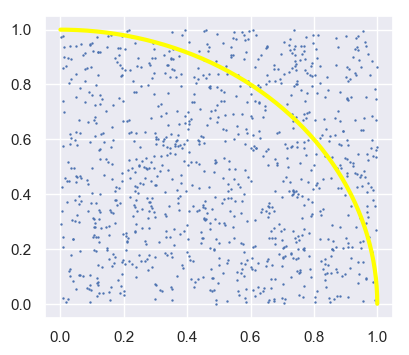

In [24]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

nsim = 1000# number of darts or simulations

dart_crd = np.zeros((nsim,2))

circDartCounter = 0
for isim in range(nsim):
    #Generate the random coordinates to simulate
    dart_crd[isim,:] = [ rnd.random() # x value 
                        ,rnd.random() # y value
                       ]
    #Walks through each digit in coordinate and squares
    distanceSquared = dart_crd[isim,0]**2 + dart_crd[isim,1]**2
    #If distance^2 is 1 then count point as within circle
    if distanceSquared <= 1: circDartCounter += 1

#Run simulation/throw darts
fig = plt.figure(figsize = (4.5,4), dpi = 100)
ax = fig.add_subplot(1,1,1)
ax.scatter ( dart_crd[:,0], dart_crd[:,1], s = 0.5, c = 'b')

# draw cicle
nangle = 150 #number of angles, more angles = smoother line (use about 100-150)
angles = np.linspace(0,np.pi/2,nangle)
circle = np.zeros((nangle,2))
circle[:,0] = np.cos(angles)
circle[:,1] = np.sin(angles)
ax.plot(circle[:,0], circle[:,1], c = "yellow", linewidth = 3)

pi = 4 * (circDartCounter / nsim)
print("Approximate value of pi = {}".format(pi))

### Problem 7

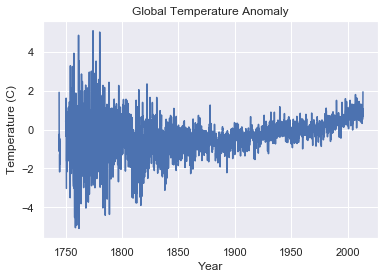

AttributeError: module 'numpy' has no attribute 'linespace'

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# download the file from web
def download(url,filePath):
    import urllib.request
    import shutil
    with urllib.request.urlopen(url) as response, open(filePath, 'wb') as out_file:
        shutil.copyfileobj(response, out_file)
    return None
filePath='./usaTempHistory.txt'
download(url='https://www.cdslab.org/recipes/programming/regression-predicting-future-global-land-temperature/usaTemperatureHistory.txt',
        filePath=filePath)

#Parse file
with open(filePath,'r') as file:
    lines=file.readlines()
    dates=[]
    anom=[]
    #grab information
    for line in lines[70:]:
        year=np.double(line[0:6])
        month=np.double(line[7:12])
        tempDiff=np.double(line[13:22])
        dates.append(year+month/13)
        anom.append(tempDiff)
        
#Plot
fig=plt.figure()
ax=fig.gca()
plt.plot(dates,anom)
ax.set_xlabel('Year')
ax.set_ylabel('Temperature (C)')
plt.title('Global Temperature Anomaly')
plt.savefig("GlobalTempAnomaly.png")
plt.show()

#Trend line
def predict(coef,dates): return coef[0]+dates+coef[1]

row=2700 #year 1970
anom = np.polyfit(x=dates[row:], y=anom[row:],deg=1)
dateRange=np.linespace(1750,2051,1000)


### Problem 4

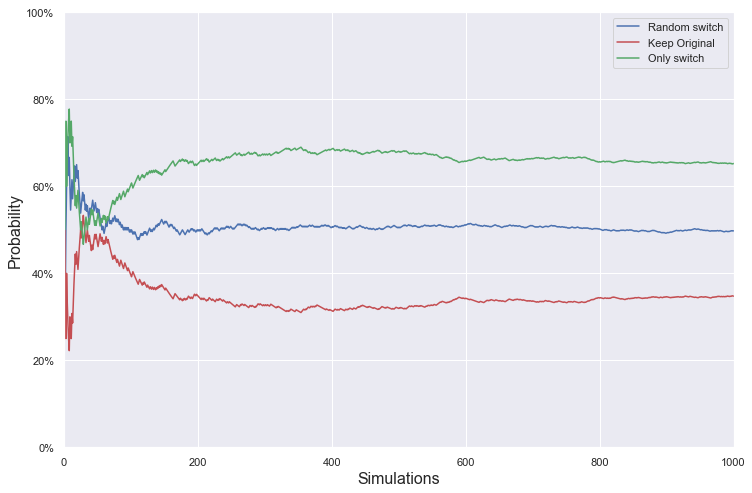

In [16]:
import random as rnd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

ngames=100000
def genGame(n: int):
    game=[]
    for _ in range(n):
        doors=[False] * 3
        winner=rnd.randint(0, 2) # Choose winning door by random
        doors[winner] = True
        game.append(doors)
    return game

def showGoat(doors):
    for i in range(1, 3):
        if doors[i] == False:
            return i

def randomChoice(game: list):
    wins=0
    attempts=0
    history=[]
    for doors in game:
        attempts += 1
        goat = showGoat(doors)
        newChoice = rnd.randint(0, 1)
        finalChoice = 0 if newChoice == 0 else 2 if goat == 1 else 1
        if (doors[finalChoice] == True):
            wins += 1
        history.append(wins / attempts)
    return wins, history

def keepChoice(game: list):
    wins=0
    attempts=0
    history=[]
    for doors in game:
        attempts+= 1
        if (doors[0] == True):
            wins+= 1
        history.append(wins / attempts)
    return wins, history

def switchChoice(game: list):
    wins=0
    attempts=0
    history=[]
    for doors in game:
        attempts += 1
        goat = showGoat(doors)
        newChoice = 1 if goat == 2 else 2
        if (doors[newChoice] == True):
            wins += 1 
        history.append(wins / attempts)
    return wins, history

game =genGame(ngames)

randomWins, randomHistory= randomChoice(game)
keepWins, keepHistory = keepChoice(game)
switchWins, switchHistory= switchChoice(game)


plt.figure(figsize=(12,8))
plt.plot(randomHistory, 'b', label="Random switch")
plt.plot(keepHistory, 'r', label="Keep Original")
plt.plot(switchHistory, 'g', label="Only switch")
plt.legend(loc='upper right')
plt.ylim(0, 1.0)
plt.xlim(0, 1000)
plt.ylabel("Probability", fontsize=16)
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1.0)) 
plt.xlabel("Simulations", fontsize=16)
plt.grid(True)
plt.show()

### Problem 2

Area under curve = 1.000020000200002


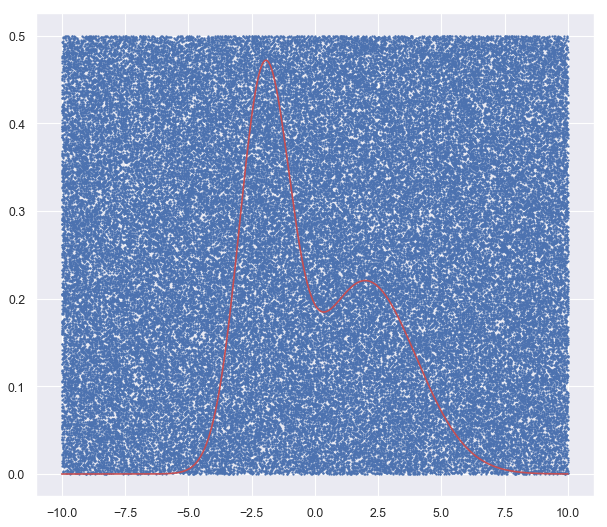

In [19]:
import numpy as np
import math
import random as rnd

def equation(x): return (1/(np.sqrt(2+np.pi)))*np.exp(-((x+2)**2)/2)+(1/(2*np.sqrt(2+np.pi)))*np.exp(-((x-2)**2)/8)

#create figure
x = np.linspace(-10,10,100000)
fig = plt.figure( figsize=(9, 8)\
                , dpi= 80\
                , facecolor='w' \
                , edgecolor='w' \
                )
ax = fig.add_subplot(1,1,1)
ax.plot(x,equation(x),color = "r")
dart_crd = np.zeros((len(x),2))
counter = 0

#generate points and plot
for i in range(len(x)):
    a = 20*rnd.random()-10
    b = 0.5*rnd.random()
    dart_crd[i,:] = [a,b]
    
if b < equation(b):
    counter += 1

ax.scatter(dart_crd[:,0],dart_crd[:,1], s = 1)

area = (counter+len(x)) / (len(x)-counter)
print("Area under curve = {}".format(area))

### Problem 5

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

nsim=10000
nstep=10
startPosition= -10

def doRandomWalk(nstep, startPosition):
    finalStep=np.random.randint(0,1,nsim)
    return finalStep

def simulateRandomWalk(nsim,nstep,startPosition):
    i=0
    finalLocations=[]
    for i in range(nsim):
        finalLocations = doRandomWalk(nstep,startPosition)
    return finalLocations
